In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib nbagg
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
verbose=1

    Data map:
    0:i
    1:tdb (terminal)
    2:tdb (future)
    3-8:Position Ecliptic J2000
    9-14:Position J2000
    15-20:Position Galactic J2000
    21:RA(h) (terminal)
    22:DEC(deg)
    23:l(deg)
    24:b(deg)
    25:d(AU)
    26-33:Asymptotic elements, q,e,i,W,w,Mo,to,mu
    34-39:Future Position Ecliptic J2000
    40-45:Future Position Galactic 
    46:RA(h) (future)
    47:DEC(deg)
    48:l(deg)
    49:b(deg)
    50:d(pc)
    51-58:Initial elements, q,e,i,W,w,Mo,to,mu

In [ ]:
#Constants
AU=1.465e8
LY=9.4608e12

In [ ]:
data=np.loadtxt("cloud-nomult.data")
datan=np.loadtxt("cloud-many.data")
data=np.loadtxt("cloud-many.data")
data=np.loadtxt("cloud.data")

In [ ]:
#Elements
qs=data[1:,51]
es=data[1:,52]
if verbose:print("Means: q:",qs.mean()/AU,", e:",es.mean())
if verbose:print("Dispersion: q:",qs.std()/AU,", e:",es.std())

fig=plt.figure()
ax=fig.gca()
ax.plot(qs/AU,es,'ko',ms=1)


In [ ]:
#Terminal J2000 coordinates
RAs=data[:,21]
DECs=data[:,22]
if verbose:print("Means: RA:",15*RAs.mean(),", DEC:",DECs.mean())
if verbose:print("Dispersion: q:",15*RAs.std(),", e:",DECs.std())

fig=plt.figure()
ax=fig.gca()
ax.plot(15*RAs,DECs,'ko',ms=1)

ax.set_xlabel('RA (deg)')
ax.set_ylabel('DEC (deg)')

In [ ]:
#Future J2000 coordinates
RAs=data[:,46]
DECs=data[:,47]

In [ ]:
fig=plt.figure()
ax=fig.gca()
ax.plot(RAs,DECs,'ko',ms=1)

In [ ]:
#Terminal positions
xts=data[:,3]
yts=data[:,4]
zts=data[:,5]
rts=np.sqrt(xts**2+yts**2+zts**2)
#Dispersion
if verbose:print("Dispersion in AU:",xts.std()/AU,yts.std()/AU,zts.std()/AU)
disp=zts.std()/rts.mean()
if verbose:print("Percentual dispersion:",disp)

In [ ]:
fig=plt.figure()
ax=fig.gca()
ax.plot(xts,yts,'ko',ms=1)

In [ ]:
#Future positions
xfs=data[:,34]
yfs=data[:,35]
zfs=data[:,36]
rfs=np.sqrt(xfs**2+yfs**2+zfs**2)
#Dispersion
if verbose:print("Dispersion in ly:",xfs.std()/LY,yfs.std()/LY,zfs.std()/LY)
disp=zfs.std()/rfs.mean()
if verbose:print("Percentual dispersion:",disp)

In [ ]:
fig=plt.figure()
ax=fig.gca()
ax.plot(xfs,yfs,'ko',ms=1)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
rt=rts.mean()
xns=xts/rt
yns=yts/rt
zns=zts/rt
ax.plot(xns,yns,zns,'ko',ms=1)

In [ ]:
#Elements
qs=data[:,51]/AU
es=data[:,52]
ies=data[:,53]
Ws=data[:,54]

In [ ]:
fig=plt.figure()
ax=fig.gca()
ax.plot(es,Ws,'ko',ms=1)

In [ ]:
#Covariance matrix
means=[1.197188708990351,.2544567273446408,2458005.972892582579,24.60295925659798,241.5429238264925,122.604016492383]
covariance=[
  [2.858709169167452E-6,1.098820139532213E-6,2.140740994127999E-5,-4.629574614074441E-6,.0001980724106465366,.0001029927307342494],
  [1.098820139532213E-6,4.223650568138116E-7,8.228257068002674E-6,-1.779505280075431E-6,7.613474148207401E-5,3.958804146112113E-5],
  [2.140740994127999E-5,8.228257068002674E-6,.0001603227078400257,-3.466805081263181E-5,.001483242149313819,.0007712542878842905],
  [-4.629574614074441E-6,-1.779505280075431E-6,-3.466805081263181E-5,7.497524956627533E-6,-.0003207714690047103,-.000166792920108298],
  [.0001980724106465366,7.613474148207401E-5,.001483242149313819,-.0003207714690047103,.01372394843890766,.007136100317461406],
  [.0001029927307342494,3.958804146112113E-5,.0007712542878842905,-.000166792920108298,.007136100317461406,.003710639376110803],
  ]

covariance=np.array(covariance)
dcovariance=np.zeros_like(covariance)
for i in range(6):
    dcovariance[i,i]=covariance[i,i]

In [ ]:
values=np.random.multivariate_normal(means,dcovariance,1000)

In [ ]:
if verbose:print(values.shape)

In [ ]:
fig=plt.figure()
ax=fig.gca()
ax.plot(values[:,0],values[:,1],'ko',ms=1)

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.plot(values[:,0],values[:,1],values[:,2],'ko',ms=1)

## Lines intersection

In [ ]:
C=3E5 #km/s
YEAR=365.25*86400 #s
LY=C*YEAR #km
PARSEC=3.2616*LY #km
if verbose:print("1 parsec = %e km"%PARSEC)

#Units
PPY=PARSEC/YEAR 
if verbose:print("1 pc/year = %e km/s"%PPY)

In [ ]:
#Definitions of lines
p1=np.array([0,0,0]);d1=np.array([0,0,1])
p2=np.array([1,0,0]);d2=np.array([1,0,1])

#Actual data
#Our object: 
p1=np.array([5.78971383586522936e+00,1.14501432490714183e+01,3.89758448167880145e+00])
d1=np.array([-1.13203438793190063e+01,-2.23879147871595947e+01,-7.62075215522603067e+00])/PPY

#Star data ()
p2=np.array([-1.39195331002988240e+02, 1.26930155523994657e+01, -1.54372105428406201e+02])
d2=np.array([-10.23491, -16.60858, -34.30936])/PPY

#Closest star
p2=np.array([107.91891000000001, -428.38295, -234.92487000000003])
d2=np.array([-1.00043, -5.59274, -2.40552])/PPY

#Similar
p2=np.array([147.671, 79.1533, -178.551])
d2=np.array([-9.56911, -19.8781, -7.687880000000001])/PPY

#Closer
#-4.19605, 10.7816, -7.46557, -12.4072, -20.0619, -9.6609
p2=np.array([-4.19605, 10.7816, -7.46557])
d2=np.array([-12.4072, -20.0619, -9.6609])/PPY

#Problematic
p2=np.array([-4.33408e+01, 4.66358e+00, -3.74980e+02])
d2=np.array([-9.65888e+00, -7.97706e+00, -4.87376e+01])/PPY

#Star data (Star 0):
p2=np.array([-3.16028220972354973e+02, 1.84156158702263504e+01, -3.58527081068144980e+02])
d2=np.array([13.37458, -17.29674, -15.42706])/PPY

#New candidates
p2=np.array([-20.185400000000001,-2.9136900000000003,16.673200000000001])
d2=np.array([-45.270899999999997,-39.641500000000001,8.8886599999999998])/PPY

#High velocity star
p2=np.array([-22.1313, 5.2090100000000001, 14.912699999999999])
d2=np.array([-16.180199999999999, -22.9924, -5.5882699999999996])/PPY

UT=1e7

In [ ]:
data.iloc[30]["hip"]

In [ ]:
GAIA[GAIA["hip"]==40170.0]

In [ ]:
#Test if lines are skewed
a=p1+d1;b=p1+2*d1
c=p2+d2;d=p2+2*d2
VM=np.vstack((a-b,b-c,c-d))
detVM=np.linalg.det(VM)
if verbose:print(detVM)

In [ ]:
#Distance
n=np.cross(d1,d2)
d=np.dot(n,(p1-p2))/np.linalg.norm(n)
if verbose:print("Distance between lines:",d)

In [ ]:
#Nearest points
n=np.cross(d1,d2)
n1=np.cross(d1,n)
n2=np.cross(d2,n)

c1=p1+np.dot((p2-p1),n2)/np.dot(d1,n2)*d1
c2=p2+np.dot((p1-p2),n1)/np.dot(d2,n1)*d2

if verbose:print("Nearest point in line 1:",c1)
if verbose:print("Nearest point in line 2:",c2)

In [ ]:
#Compute time of encounter
print(c2[0],p2[0],d2[0])
t=(c1[0]-p1[0])/d1[0]
if verbose:print("Encounter time:",t)
t=(c2[0]-p2[0])/d2[0]
if verbose:print("Encounter time:",t)

In [ ]:
#Time of minimum distance
dp=p1-p2
dv=d1-d2
dvmag=np.linalg.norm(dv)
tsimin=-np.dot(dp,dv)/(dvmag*dvmag)
print(tsimin)
dsimin=np.linalg.norm(dp+dv*tsimin)
print(dsimin)

In [ ]:
dp,dv,d1,d2

In [ ]:
ts=np.linspace(-10,10,10000)
r1s=np.array([p1+d1*t for t in ts])
r2s=np.array([p2+d2*t for t in ts])
ds=np.array([np.linalg.norm(r1s[i]-r2s[i]) for i in range(len(ts))])
imin=ds.argmin()
print(ts[imin]/1e6,ds[imin])

In [ ]:
#Plot
ts=np.linspace(-10.0*UT,10.0*UT,100)
r1s=np.array([p1+d1*t for t in ts])
r2s=np.array([p2+d2*t for t in ts])

fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

ax.plot([0],[0],[0],'o',color='yellow',ms=10)


ax.plot(r1s[:,0],r1s[:,1],r1s[:,2],'b-') #BLUE IS BODY
ax.plot(r2s[:,0],r2s[:,1],r2s[:,2],'r-') #RED IS STAR

ax.plot([p1[0]],[p1[1]],[p1[2]],'g^',ms=10)
ax.plot([p2[0]],[p2[1]],[p2[2]],'g^',ms=10)

dt=1*UT
ax.plot([p1[0],p1[0]+dt*d1[0]],[p1[1],p1[1]+dt*d1[1]],[p1[2],p1[2]+dt*d1[2]],'g-',ms=10)
ax.plot([p2[0],p2[0]+dt*d2[0]],[p2[1],p2[1]+dt*d2[1]],[p2[2],p2[2]+dt*d2[2]],'g-',ms=10)

ax.plot([c1[0]],[c1[1]],[c1[2]],'rs',ms=10)
ax.plot([c2[0]],[c2[1]],[c2[2]],'rs',ms=10)
ax.plot([c1[0],c2[0]],[c1[1],c2[1]],[c1[2],c2[2]],'k-')

In [ ]:
GAIA=pd.read_csv("../RVGaia/DB/RVGaia.csv")

In [ ]:
GAIA

In [ ]:
data=pd.read_csv('encounters.data')

In [ ]:
data

In [ ]:
past=data[data.tmin<0]
if verbose:print("Encounters in the past:",len(past))

In [ ]:
past["admin"]=np.abs(past["dmin"])

In [ ]:
past

In [ ]:
close=past.sort_values(by=['admin'])

In [ ]:
veryclose=close[close["admin"]<1]

In [ ]:
if verbose:print("Really close encounters:",len(veryclose))

In [ ]:
veryclose

In [ ]:
verylike=veryclose.sort_values(by=['vrel'])

In [ ]:
verylike

In [ ]:
verylike.iloc[1].values[1:7].tolist()

In [ ]:
GAIA.iloc[int(verylike.iloc[1][0])]

In [ ]:
#70136
GAIA.iloc[70136]

In [ ]:
UL=1.496e11
UM=2e30
GCONST=6.67e-11
UT=np.sqrt(UL**3/(GCONST*UM))
if verbose:print(UL/UT/1e3)

In [ ]:
E=-GCONST*UM/(2*UL)
if verbose:print("Total orbital energy:",E)

In [ ]:
UJ=GCONST*(1e-3*UM)/(7e7)
if verbose:print(np.sqrt(2*(E+UJ)))

In [ ]:
#Slingshot
#Formulas in: http://www.mathpages.com/home/kmath114/kmath114.htm
RAD=180/np.pi
DEG=1/RAD
U=1
v1=1
qs=np.linspace(0,90,100)*DEG
v2s=(v1+2*U)*np.sqrt(1-4*U*v1*(1-np.cos(qs))/(v1+2*U)**2)
vinfs=np.sqrt(v2s**2-2*U**2)

In [ ]:
fig=plt.figure()
ax=fig.gca()
ax.plot(qs,vinfs)

## Semianalytic expulsion velocity distribution

In [9]:
#Constants
AU=1.496e11 #m
MSUN=1.98e30 #kg
GCONST=6.67e-11 #m^3/(kg s^2)
RAD=180/np.pi
DEG=1/RAD

#Units
G=1.0
UL=1*AU
UM=1*MSUN
UT=np.sqrt(G*UL**3/(GCONST*UM))
UV=UL/UT
if verbose:print("Time unit:",UT)

In [10]:
#Star properties
Ms=0.5
mu=G*Ms
if verbose:print("mu:",mu)

#Planet and star properties (canonic units)
ap=2.9
Mp=1e-3
Rp=7e7/AU
if verbose:print("Planetary radius:",Rp)
RH=ap*(Mp/(3*Ms))**(1./3)
if verbose:print("Hill radius:",RH)
#Planetary orbital velocity
vp=np.sqrt(mu/ap)
if verbose:print("Orbital velocity:",vp)
#Escape velocity
vesc=np.sqrt(2*mu/ap)
if verbose:print("Escape velocity:",vesc)

In [ ]:
#Example of slingshot

#Initial velocity of particle respect to planet
vinf1=0.3

#Incoming angle
theta=20*DEG

#Velocity w.r.t. star
vx=-vinf1*np.cos(theta)+u
vy=+vinf1*np.sin(theta)
vmag=np.sqrt(vx**+vy**2)
if verbose:print("Particle velocity w.r.t. star:",[vx,vy])
if verbose:print("Magnitude of velocity:",vmag)

#Semimajor axis using vis-viva
a=mu/vinf1
if verbose:print("Semimajor axis:",a)

#Periastron
q=0.1*RH

#Corresponding eccentricity
e=q/a+1
if verbose:print("Eccentricity:",e)

#Hiperbolic angle
phi=np.arccos(1/e)
if verbose:print("Aperture angle:",phi*RAD)

#Output angle
beta=2*phi-theta
if verbose:print("Output angle:",beta*RAD)

In [ ]:
#Output vinf
vinf2x=vinf1*np.cos(beta)
vinf2y=vinf1*np.sin(beta)
if verbose:print("Output vector w.r.t. planet:",[vinf2x,vinf2y])

#Output velocity
vx=vinf2x+u
vy=vinf2y
if verbose:print("Output velocity w.r.t. star:",[vx,vy])

#Magnitude of output velocity
v2=vx**2+vy**2
if verbose:print("Output velocity:",np.sqrt(v2))

#Infinite velocity for the system
vinf2=v2**2-vesc**2
if vinf2<0:
    if verbose:print("El cuerpo sigue ligado")
else:
    vinf=np.sqrt(vinf2)
    if verbose:print("Velocity body after escaping solar sytem: %e km/s"%(vinf*UV/1e3))

## Monte Carlo escaping velocity distribution

In [11]:
#Routines
rand=np.random.normal
verbose=0

#Basic theory: http://www.mathpages.com/home/kmath114/kmath114.htm

In [45]:
#Star properties
Ms=1.0
mu=G*Ms
if verbose:print("mu:",mu)

#Planet and star properties (canonic units)
ap=1
Mp=1e-3
Rp=7e7/AU
if verbose:print("Planetary radius:",Rp)
RH=ap*(Mp/(3*Ms))**(1./3)
if verbose:print("Hill radius:",RH)
#Planetary orbital velocity
vp=np.sqrt(mu/ap)
if verbose:print("Planetary orbital velocity:",vp)
#Escape velocity
vesc=np.sqrt(2*mu/ap)
if verbose:print("Planetary system velocity:",vesc)

In [46]:
#np.random.seed(1)
Npart=10000
n=0
vinfs=[]
while n<Npart:

    if verbose:print("Test particle:",n)
    #Basic elements
    ab=rand(ap,0.5)
    eb=rand(0.5,0.5)
    if eb<0 or eb>1:continue
    pb=ab*(1-eb**2)
    ib=rand(2)
    hop=np.sqrt(mu/pb)
    if verbose:print("\tOrbital elements (a,e,p,h/p): ",ab,eb,pb,hop)

    #Longitude of the ascending node
    Ob=0.0
    if np.random.rand()>0.5:Ob=180.0
    if verbose:print("\tLongitude of the ascending note (O):",Ob)
    
    #Argument of the periastron
    if Ob==0:
        coswb=(pb-ap)/eb
        if np.abs(coswb)>1:continue
        wb=np.arccos(coswb)*RAD
        wpf=0.0
    else:
        coswb=(ap-pb)/eb
        if np.abs(coswb)>1:continue
        wb=np.arccos(coswb)*RAD
        wpf=180.0

    if verbose:print("\tPeriastron argument (w):",wb)
    if verbose:print("\tw+f:",wpf)

    #Magnitude of asteroid velocity
    v=np.sqrt(2*mu/ap-mu/ab)
    if verbose:print("\tMagnitude of asteroid velocity w.r.t. Sun:",v)
    
    #Components of asteroid velocity
    #xdot=-hop*eb*np.cos(Ob*DEG)*(np.sin(wpf*DEG)+eb*np.sin(wb*DEG))
    xdot=-hop*eb*np.cos(Ob*DEG)*np.sin(wb*DEG)    
    ydot=+hop*np.cos(Ob*DEG)*np.cos(ib*DEG)*(np.cos(wpf*DEG)+eb*np.cos(wb*DEG))
    zdot=+hop*np.sin(ib*DEG)*(np.cos(wpf*DEG)+eb*np.cos(wb*DEG))
    
    #Magnitude
    if verbose:print("\tHeliocentric velocity :",xdot,ydot,zdot," (%lf)"%np.sqrt(xdot**2+ydot**2+zdot**2))
    #if verbose:print("Magnitude of asteroid velocity w.r.t. Sun:",np.sqrt(xdot**2+ydot**2+zdot**2))
    
    #Relative velocity
    xdotrel=xdot-0
    ydotrel=ydot-vp
    zdotrel=zdot-0
    if verbose:print("\tRelative velocity :",xdotrel,ydotrel,zdotrel)
    vinf2=xdotrel**2+ydotrel**2+zdotrel**2
    vinf=np.sqrt(vinf2)
    rhorel=np.sqrt(xdotrel**2+ydotrel**2+zdotrel**2)
    if verbose:print("\tRelative velocity:",vinf)

    #Incident angle
    theta=np.abs(np.arccos((-ydotrel*vp)/(vinf*vp)))*RAD
    if verbose:print("\tIncident angle (cos^-1 (vb.vp)/(vp vp)):",theta)
    
    #Impact parameter
    q=(0.5*RH-Rp)*np.random.rand()+Rp
    #q=2.5*Rp
    if verbose:print("\tImpact parameter:",q)
    
    #Semimajor axis and eccentricity
    ainf=1/vinf
    einf=q/ainf+1
    phi=np.arccos(1/einf)*RAD
    if verbose:print("\tAsymptotic a,e,phi:",ainf,einf,phi)
    
    #Output angle
    beta=2*phi-theta
    if verbose:print("\tOutput angle:",beta)
    
    #Output vinf
    vinf2y=vinf*np.cos(beta)
    vinf2x=vinf*np.sin(beta)
    if verbose:print("\tOutput vector w.r.t. planet:",[vinf2x,vinf2y])

    #Output velocity
    vy=vinf2y+vp
    vx=vinf2x
    if verbose:print("\tOutput velocity w.r.t. star:",[vx,vy])

    #Magnitude of output velocity
    vout=np.sqrt(vx**2+vy**2)
    if verbose:print("\tOutput velocity:",vout)

    #Infinite velocity for the system
    vinf2=vout**2-vesc**2
    if vinf2<0:
        if verbose:print("\tEl cuerpo sigue ligado")
        continue
    else:
        vinf=np.sqrt(vinf2)
        vinfs+=[vinf*UV/1e3]
        if verbose:print("\tVelocity body after escaping solar sytem: %e km/s"%(vinf*UV/1e3))

    if verbose:print
    n+=1
vinfs=np.array(vinfs)

/Users/jzuluaga/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in sqrt


<IPython.core.display.Javascript object>


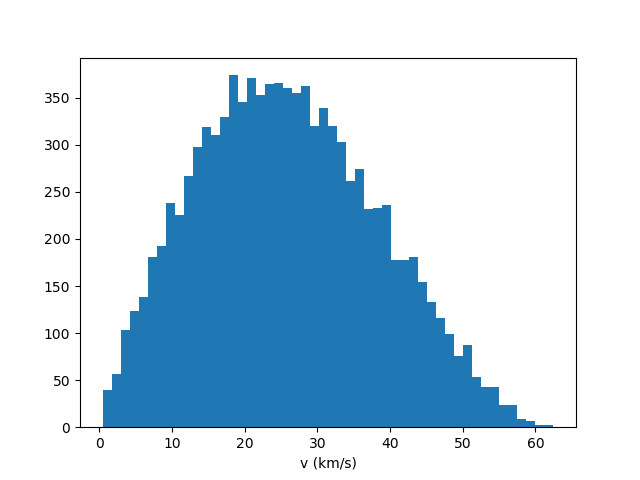

In [47]:
fig=plt.figure()
ax=fig.gca()

ax.hist(vinfs,50)
ax.set_xlabel("v (km/s)")

In [ ]:
print("Average velocity: %lf+/-%lf"%(vinfs.mean(),vinfs.std()))

In [ ]:
data=np.loadtxt("ejected_orbital_parameters.dat")

In [ ]:
fig=plt.figure()
ax=fig.gca()

vinfs=data[:,13]
vinfs=vinfs[vinfs<100]
ax.hist(vinfs)

In [ ]:
import astropy

In [ ]:
import astropy.coordinates as coord
import astropy.units as u

In [ ]:
c1 = coord.ICRS(ra=45.1128*u.degree, dec=0.380844*u.degree,
                distance=(2.09081*u.mas).to(u.pc, u.parallax()),
                pm_ra_cosdec=-1.57293*np.cos(0.380844*np.pi/180)*u.mas/u.yr,
                pm_dec=-11.6616*u.mas/u.yr,
                radial_velocity=2.061*u.km/u.s)

In [ ]:
c1.transform_to(coord.Galactic)

In [ ]:
gc1 = c1.transform_to(coord.Galactocentric)

In [ ]:
print(gc1)

In [ ]:
GAIA.iloc[0]

In [ ]:
coord.ICRS?

In [ ]:
data=pd.read_csv('candidates.csv')

In [ ]:
data.sort_values(by=['vrel'])[["tmin","dmin"]]

In [ ]:
data.iloc[30].values

In [ ]:
data=pd.read_csv('encounters.csv')

In [ ]:
data

In [ ]:
rhosun=0.1*MSUN/(1e3*PARSEC)**3
z=27*PARSEC*1E3
dphidz=4*np.pi*GCONST*rhosun*z
print(dphidz)

Units of gradient of phi: UL^3/(UM UT^2) * UM / UL^3 * UL = UL/UT^2

In [ ]:
UL=1*PARSEC*1E3
UM=1*MSUN
UT=1*YEAR
UV=UL/UT
print(UM,UL/1e16,UT)
G=GCONST/(UL**3/(UM*UT**2))
if verbose:print("G=",G)

In [ ]:
print("dphidz = %e m/s^2"%dphidz)
print("dphidz = %e UL/UT^2"%(dphidz/(UL/UT**2)))

## Integration results

In [ ]:
data=pd.read_csv("cloud-int.csv")

In [ ]:
data["t"]

In [ ]:
fig=plt.figure()
ax=fig.gca()
t=data["t"]

Rs=data["part0-R"]
phis=data["part0-phi"]
zs=data["part0-Z"]

ax.plot(t,Rs)

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

xs=data["part0-x"].values
ys=data["part0-y"].values
zs=data["part0-z"].values

ax.plot(xs,ys,zs)

xs=data["part5-x"].values
ys=data["part5-y"].values
zs=data["part5-z"].values

ax.plot(xs,ys,zs)

rmax=max(np.abs(xs).max(),np.abs(ys).max())
ax.set_xlim((-rmax,rmax))
ax.set_ylim((-rmax,rmax))
ax.set_zlim((-1e2,1e2))

## Distance from point to interval

In [ ]:

#Segment
p1=np.array([0,0,0])
p2=np.array([1,0,0])

#Point
p=np.array([1.5,0.5,0])

#Segment
p1=np.array([-8.19403e+03,-1.17627e+03,2.94740e+01])
p2=np.array([-8.19038e+03,-1.19769e+03,2.93844e+01])

#Point
p=np.array([-8.19157e+03,-1.19456e+03,2.79498e+01])

#Position
dp=np.dot((p-p1),(p2-p1))/np.linalg.norm(p2-p1)**2*(p2-p1)
dm=np.linalg.norm((p-p1)-dp)

#Time
dt=dp[0]/(p2[0]-p1[0])

print("Length of segment:",np.linalg.norm(p2-p1))
print("Position projection point in segment:",dp)
print("Distance from segment:",dm)
print("dt:",dt)



In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

ax.plot([p1[0],p2[0]],[p1[1],p2[1]],[p1[2],p2[2]])
ax.plot([p[0]],[p[1]],[p[2]],'ko')

In [ ]:
data=pd.read_csv("encounters.csv")

In [ ]:
tmins=np.abs(data.tmin[data.tmin<0])/1e6

In [ ]:
fig=plt.figure()
ax=fig.gca()
ax.hist(tmins,100)

ax.set_xlim((0,100))

In [ ]:
pot=pd.read_csv('potential.csv')

In [ ]:
pot.sort_values("dynvrel")

In [ ]:
1e-3/3600*180/np.pi

In [16]:
data=pd.read_csv("potential.csv")

In [24]:
data.sort_values(by="dyndmin")[["hip","dyndmin","vrel"]]

,hip,dyndmin,vrel
4,43667.0,0.13079,41.50770
16,86282.0,0.45642,29.02070
2,NaN,0.99558,453.98400
1,NaN,1.12612,475.01000
3,8582.0,1.20241,34.06690
0,NaN,1.22139,39.57390
10,91699.0,1.29896,14.07810
5,42567.0,1.51702,53.28950
13,85295.0,1.66684,32.92100
6,40170.0,1.78323,5.30232


In [49]:
a=1*((86400*2e30**2)/(2*np.pi*6.67e-11))**(1./3)/(2e30/1e3)

In [53]:
a*25.5*3.971**(1./3)*1.1**(2./3)*318

64.15862792893667

In [52]:
print(a*318)

1.4910302969047593


<IPython.core.display.Javascript object>


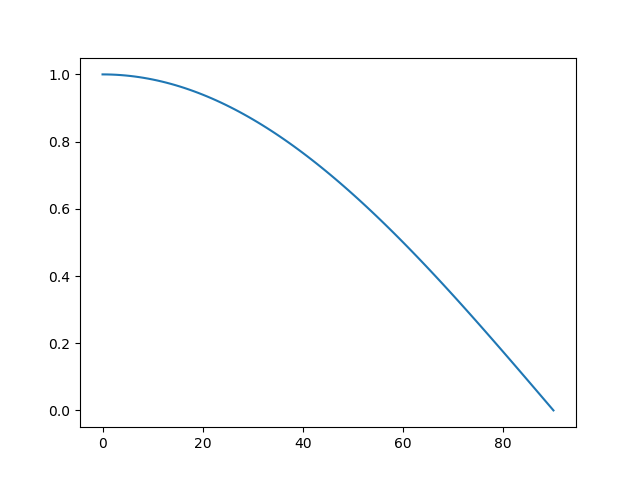

In [62]:
fig=plt.figure()
ax=fig.gca()

ies=np.linspace(0.0,90.0,100)
ax.plot(ies,np.sqrt(1-np.sin(ies*np.pi/180)**2))

In [64]:
(10/1e2)**(1./6)*0.1**(1./6)

0.464158883361278